In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# load data
df=pd.read_csv("../files/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
#  Data cleaning(Remove NA, ?, Negative values etc.) 
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# remove -ve values
for col in df.select_dtypes(include=np.number).columns:
    df = df[df[col] >= 0]

print("Data clened")

Data clened


In [6]:
# Error correcting(Outlier detection and removal)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
print("Outliers removed")

Outliers removed


In [7]:
# Data Transformation

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data transformed")

Data transformed


In [8]:
# Build Data model using regression and kNN methods and compare accuracy of

# train and split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

In [9]:
print("\n Accuracy Comparison:")
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"kNN Accuracy: {knn_acc:.4f}")

print("\n Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

print(" kNN Classification Report:")
print(classification_report(y_test, knn_pred))


 Accuracy Comparison:
Logistic Regression Accuracy: 0.8745
kNN Accuracy: 0.8571

 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        94
           1       0.86      0.93      0.90       137

    accuracy                           0.87       231
   macro avg       0.88      0.86      0.87       231
weighted avg       0.88      0.87      0.87       231

 kNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        94
           1       0.89      0.87      0.88       137

    accuracy                           0.86       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.86      0.86      0.86       231



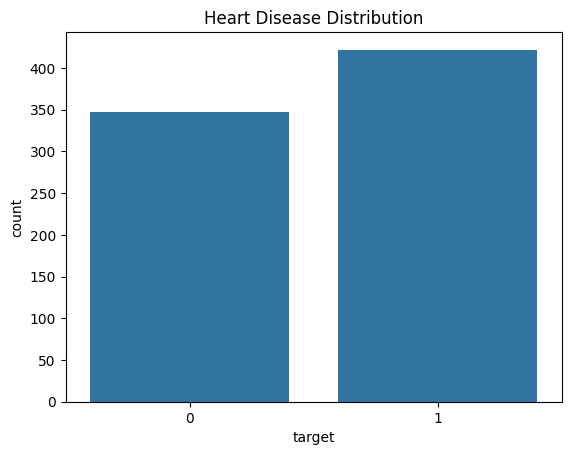

In [10]:
#Visualize Target Distribution
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()